### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas_profiling import ProfileReport

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#reading of dataset
train = pd.read_csv('CarPrice_data.csv')

In [4]:
train.describe().T #dataset's quick description

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [5]:
train.info() #quick info on columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
train.isnull().sum() #checking for missing data

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
train.duplicated().sum() #checking for duplicates

0

In [8]:
train.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Data Cleaning

In [9]:
train['make'] = [car.split(' ')[0].lower() for car in train.CarName] #create column with the car brand name
train['make']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
5             audi
6             audi
7             audi
8             audi
9             audi
10             bmw
11             bmw
12             bmw
13             bmw
14             bmw
15             bmw
16             bmw
17             bmw
18       chevrolet
19       chevrolet
20       chevrolet
21           dodge
22           dodge
23           dodge
24           dodge
25           dodge
26           dodge
27           dodge
28           dodge
29           dodge
30           honda
31           honda
32           honda
33           honda
34           honda
35           honda
36           honda
37           honda
38           honda
39           honda
40           honda
41           honda
42           honda
43           isuzu
44           isuzu
45           isuzu
46           isuzu
47          jaguar
48          jaguar
49          jaguar
50           maxda
51           maxda
52          

In [10]:
train['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

* Notice that there are some entries in the make column with spelling errors. 

In [11]:
train.loc[(train['make'] == 'maxda'), 'make'] = 'mazda'
train.loc[(train['make'] == 'porcshce'), 'make'] = 'porsche'
train.loc[(train['make'] == 'toyouta'), 'make'] = 'toyota'
train.loc[(train['make'] == 'vokswagen'), 'make'] = 'volkswagen'
train.loc[(train['make'] == 'vw'), 'make'] = 'volkswagen'
train['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [12]:
#adding column that contains the combined mile per gallon of the cars
train['combinedmpg'] = (((train.citympg * 0.55) + (train.highwaympg * 0.45))/2).astype(int)
train.combinedmpg

0      11
1      11
2      11
3      13
4       9
5      10
6      10
7      10
8       9
9       9
10     12
11     12
12     12
13     12
14     11
15      9
16      9
17      8
18     24
19     20
20     20
21     19
22     17
23     13
24     17
25     17
26     17
27     13
28     13
29     10
30     25
31     17
32     19
33     15
34     15
35     15
36     15
37     14
38     14
39     14
40     14
41     12
42     13
43     13
44     20
45     20
46     13
47      8
48      8
49      7
50     15
51     17
52     17
53     17
54     17
55      9
56      9
57      9
58      9
59     14
60     14
61     14
62     14
63     19
64     14
65     11
66     17
67     11
68     11
69     11
70     11
71      8
72      8
73      7
74      7
75     10
76     19
77     17
78     17
79     13
80     13
81     14
82     10
83     10
84     10
85     14
86     14
87     13
88     13
89     16
90     23
91     16
92     16
93     16
94     16
95     16
96     16
97     16
98     16
99     15


## EDA

In [13]:
sns.set_theme(style = 'dark') #setting visualization colors

<AxesSubplot:xlabel='make', ylabel='count'>

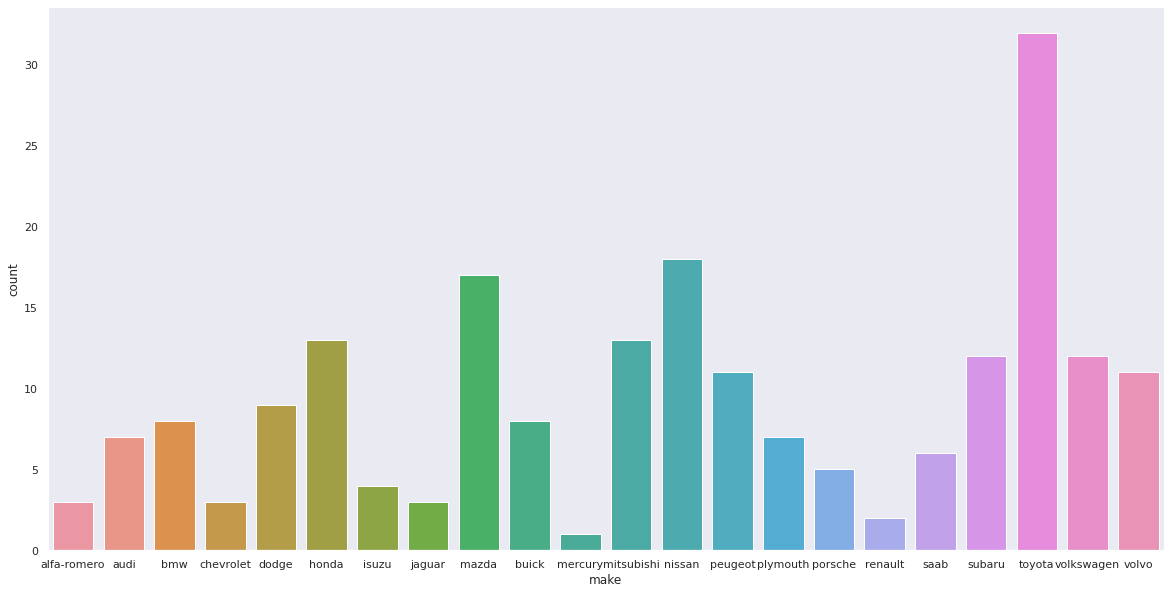

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'make', data=train)

<AxesSubplot:xlabel='make'>

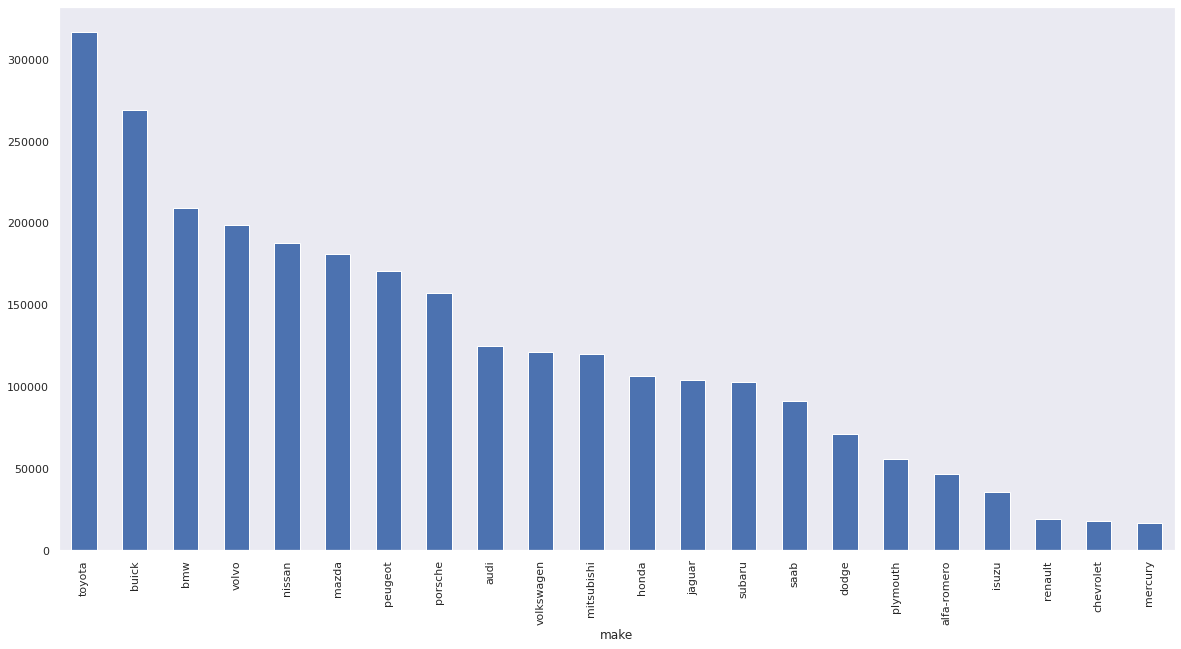

In [15]:
train.groupby('make')['price'].sum().sort_values(ascending=False).plot(kind = 'bar', figsize=(20,10))

<AxesSubplot:xlabel='make'>

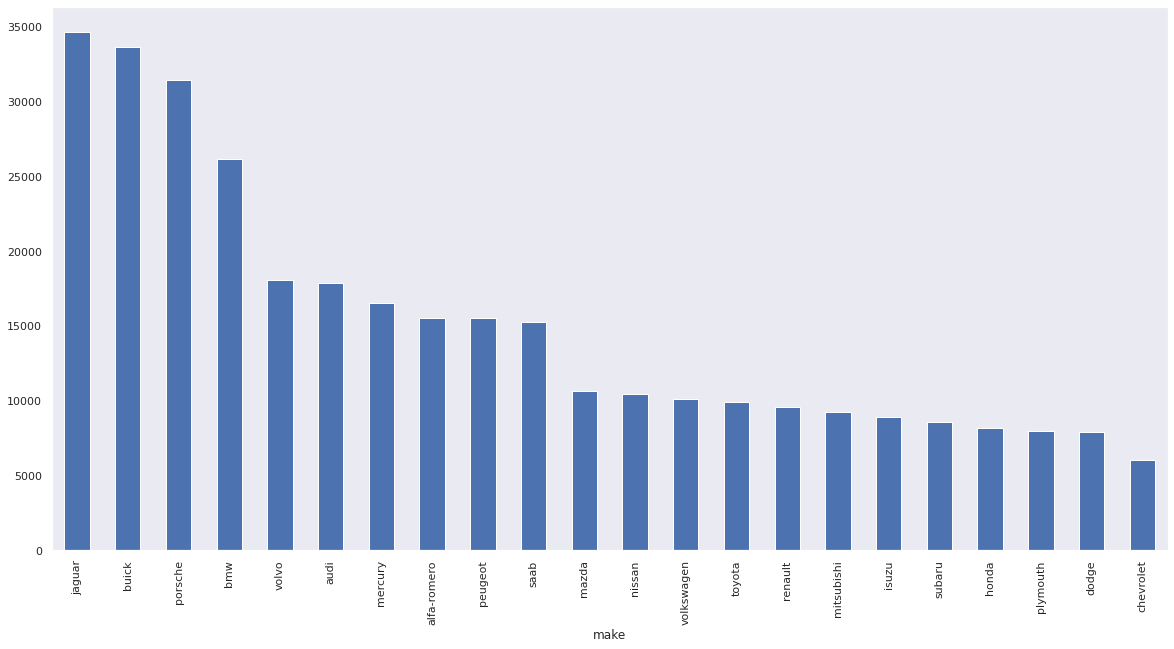

In [16]:
train.groupby('make')['price'].mean().sort_values(ascending=False).plot(kind = 'bar', figsize=(20,10))

<AxesSubplot:xlabel='make,doornumber'>

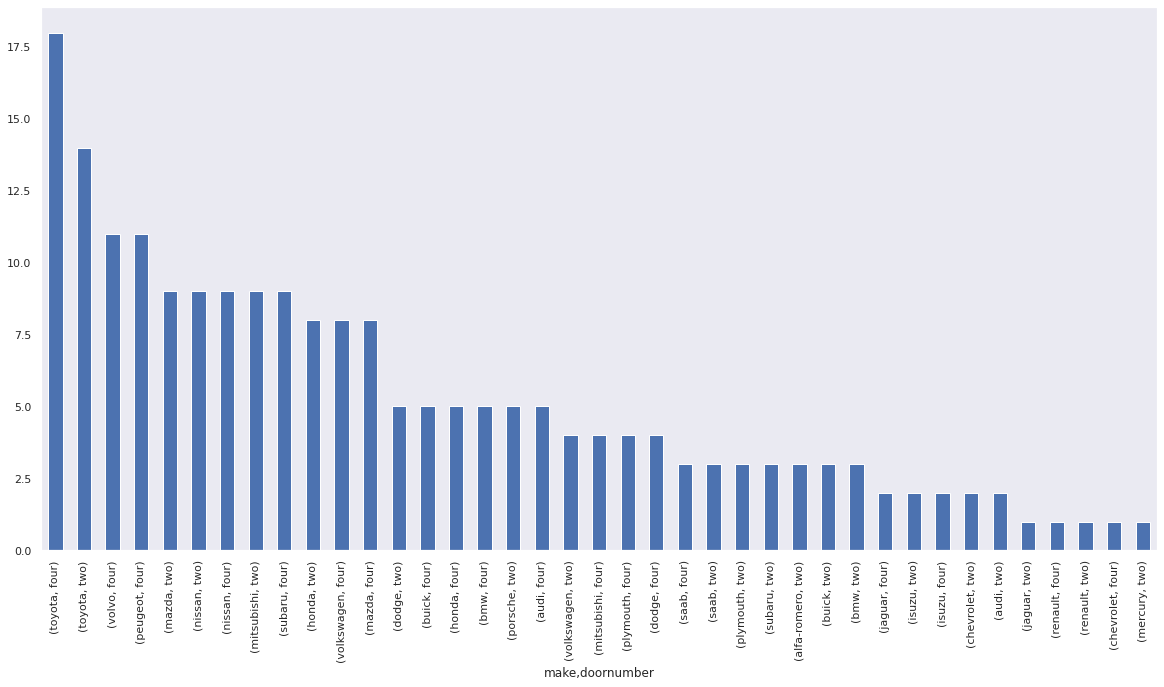

In [17]:
train.groupby('make')['doornumber'].value_counts().sort_values(ascending=False).plot(kind = 'bar', figsize=(20,10))

### Numerical Variables

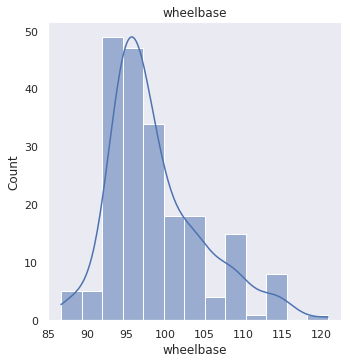

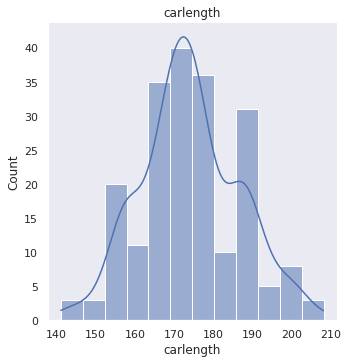

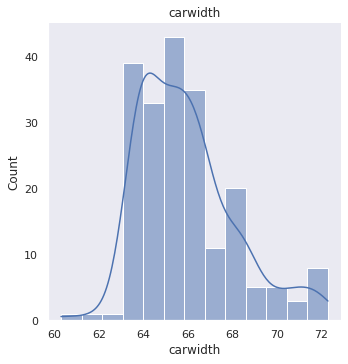

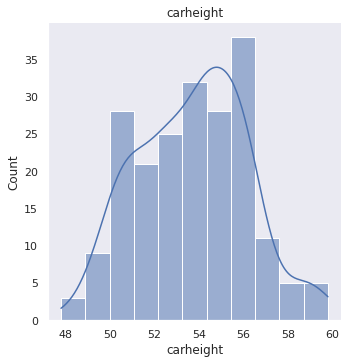

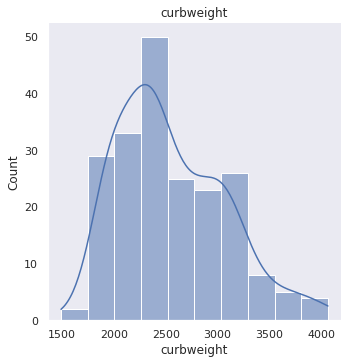

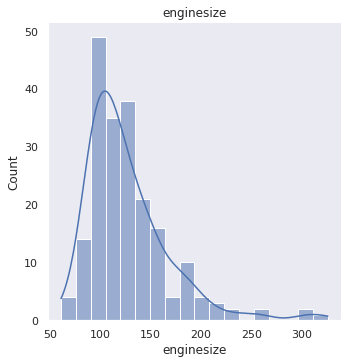

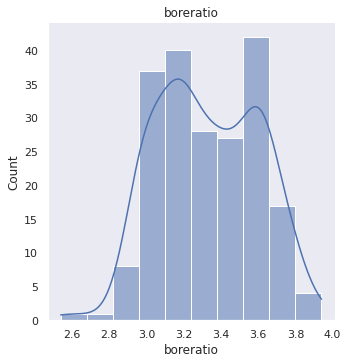

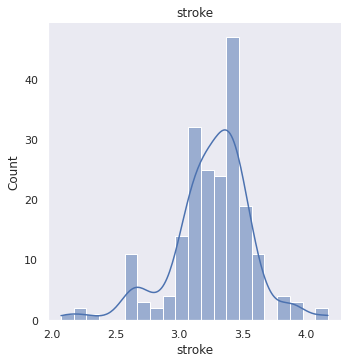

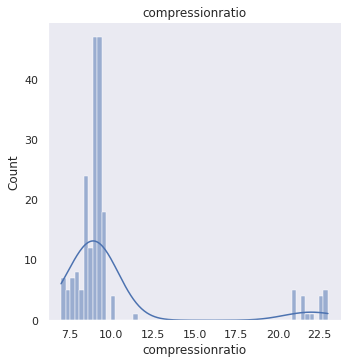

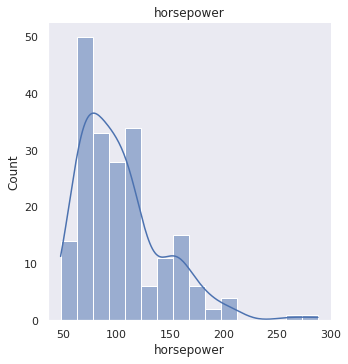

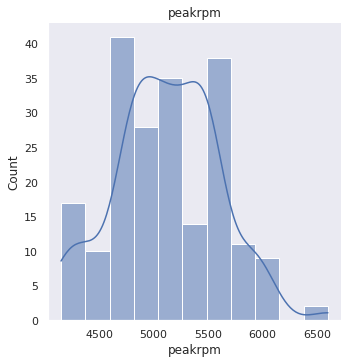

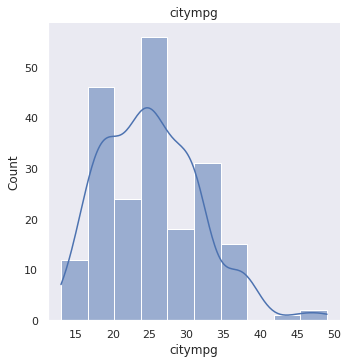

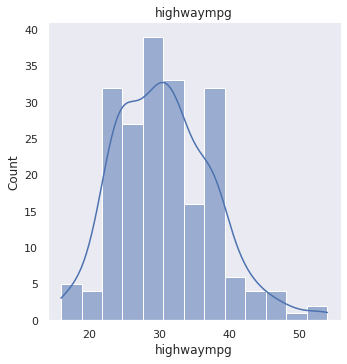

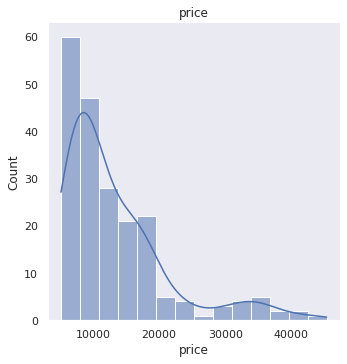

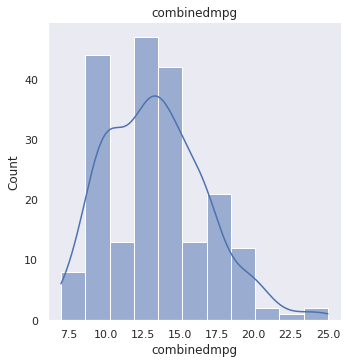

In [18]:
#loop to display the distribution of all the numerical columns in the dataset
for col in train.select_dtypes('number').drop(columns=['car_ID', 'symboling']):
    sns.displot(train[col], kde = True)
    plt.title(col)
    plt.show()

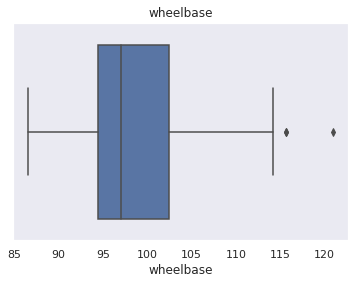

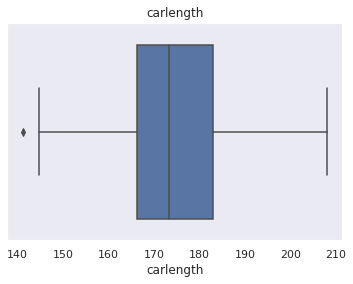

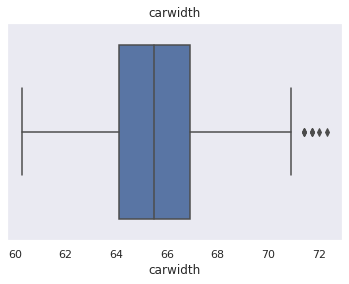

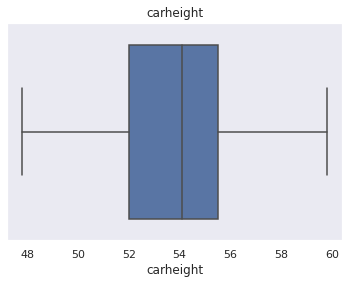

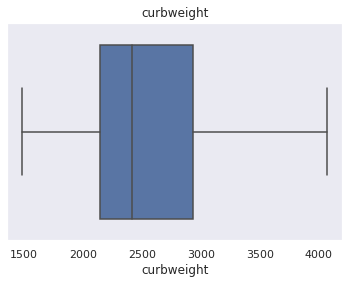

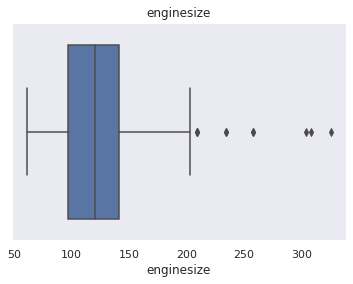

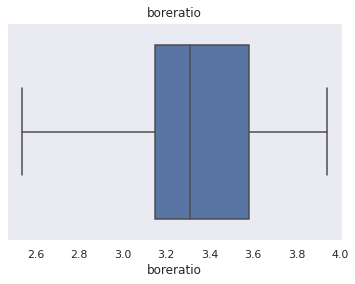

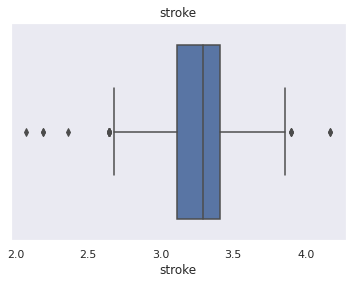

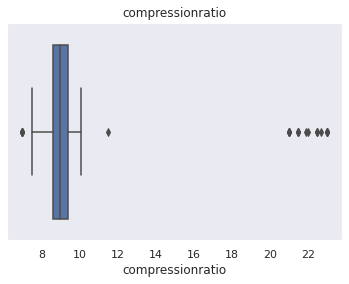

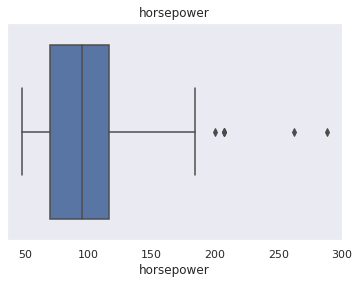

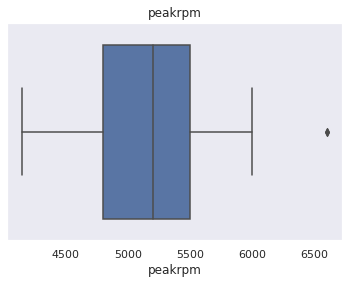

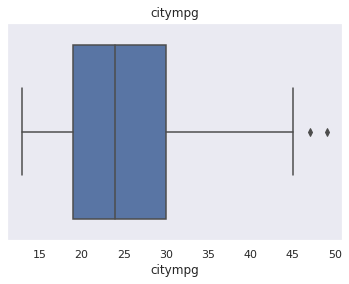

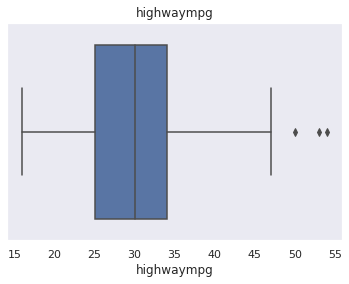

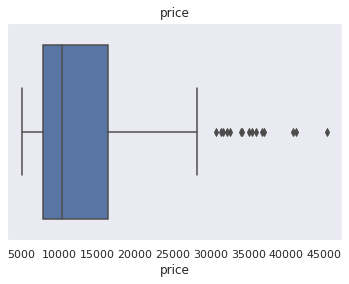

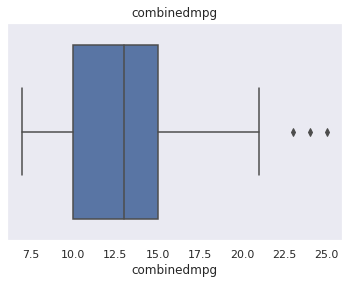

In [19]:
#loop to display the distribution of all the numerical columns in the dataset
for col in train.select_dtypes('number').drop(columns=['car_ID', 'symboling']):
    sns.boxplot(x = train[col], orient = 'h')
    plt.title(col)
    plt.show()

In [20]:
train.make.loc[train.price > 30000]

15         bmw
16         bmw
17         bmw
47      jaguar
48      jaguar
49      jaguar
70       buick
71       buick
72       buick
73       buick
74       buick
126    porsche
127    porsche
128    porsche
129    porsche
Name: make, dtype: object

from dataprep.eda import create_report

create_report(train.drop(columns=['car_ID']))

In [21]:
train['make'].value_counts() #getting number of cars each brand sold

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: make, dtype: int64

* Japanese cars are the best-selling car brands. They fill the top 5 spots of most cars sold with Toyota leading the pack with 32 cars sold, almost double of the next best-selling brand, Nissan.

In [22]:
[print(train[['make', 'CarName']].loc[train['price'] == comp])for comp in train['price'].sort_values(ascending=True).head(10)]

       make CarName
138  subaru  subaru
         make           CarName
18  chevrolet  chevrolet impala
     make    CarName
50  mazda  maxda rx3
       make                CarName
150  toyota  toyota corona mark ii
          make            CarName
76  mitsubishi  mitsubishi mirage
     make      CarName
32  honda  honda civic
      make       CarName
89  nissan  Nissan versa
         make            CarName
21      dodge      dodge rampage
118  plymouth  plymouth fury iii
         make            CarName
21      dodge      dodge rampage
118  plymouth  plymouth fury iii
     make           CarName
51  mazda  maxda glc deluxe


[None, None, None, None, None, None, None, None, None, None]

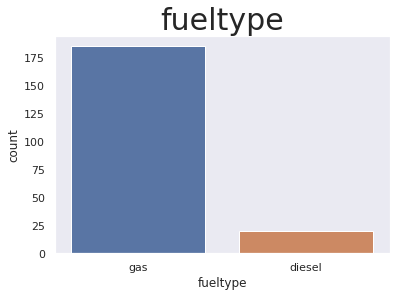

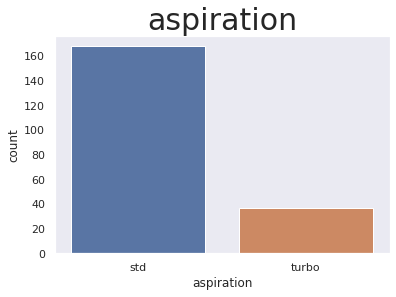

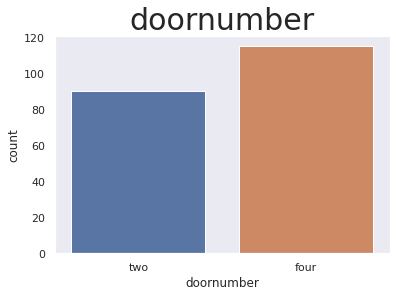

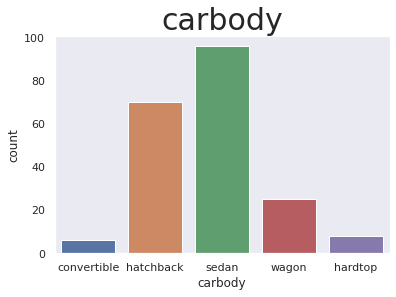

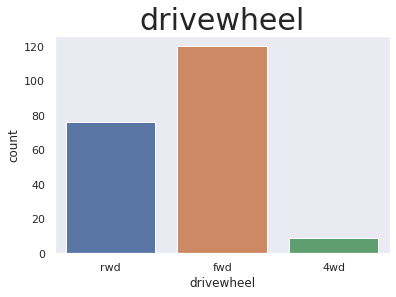

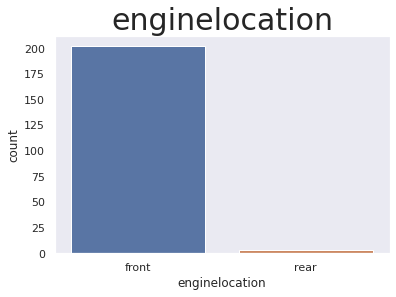

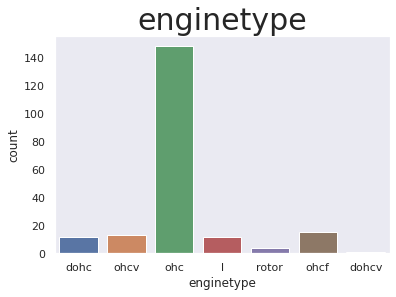

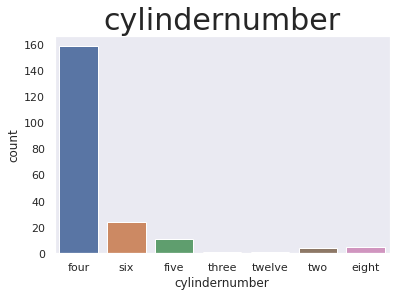

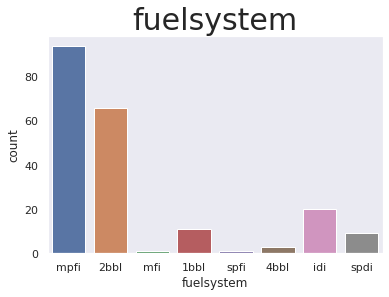

In [23]:
#loop to display the distribution of all the categorical columns in the dataset
for col in train.select_dtypes('object').drop(columns=['CarName', 'make']):
    plt.title(col, size = 30)
    sns.countplot(x = train[col])
    plt.show()

In [24]:
train.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'make', 'combinedmpg'],
      dtype='object')

<AxesSubplot:>

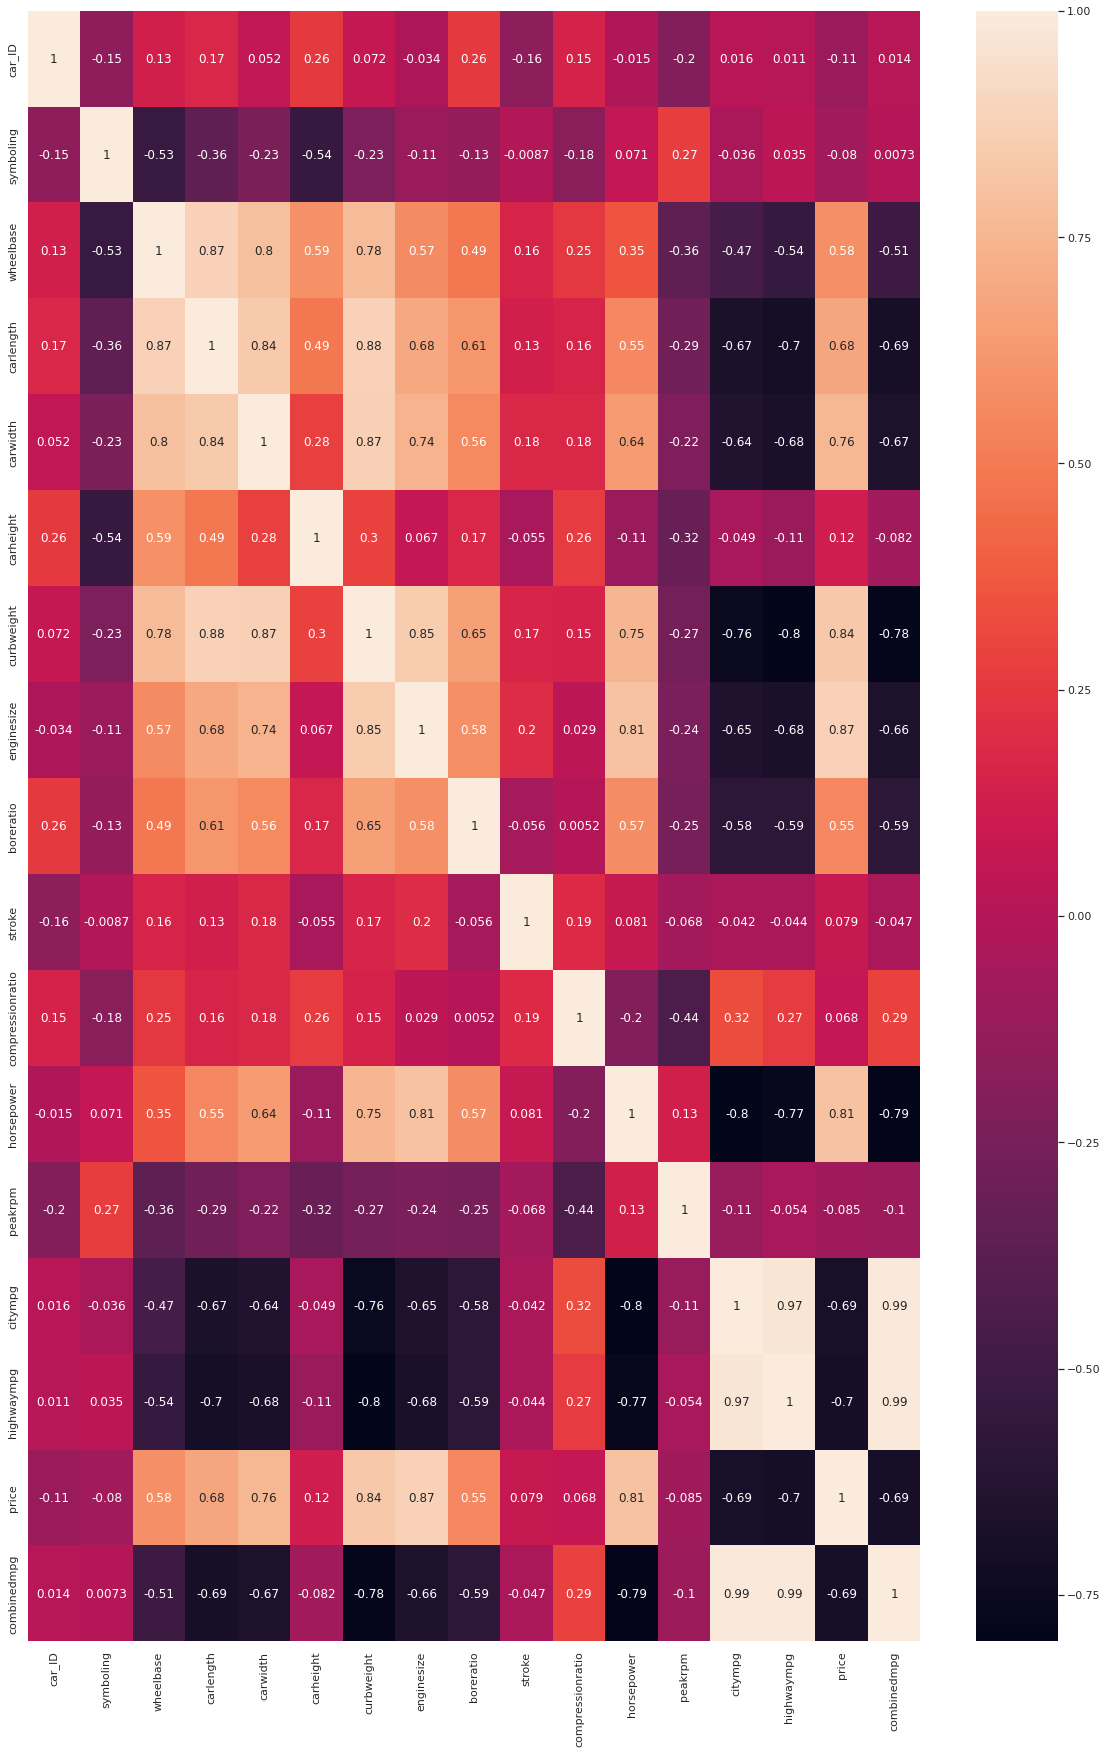

In [25]:
#correlation matrix to see features to select
plt.figure(figsize=(20,30))
sns.heatmap(train.corr(), annot=True)

## Feature Engineering

In [26]:
X = train.drop(columns=['price', 'car_ID', 'symboling', 'carheight', 'stroke', 'compressionratio', 'peakrpm'])
y = train.price

### Label Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder
Lencoder = LabelEncoder()

In [28]:
for col in X.select_dtypes(include='object').columns:
    X[col] = Lencoder.fit_transform(X[col])

X.dtypes

CarName             int64
fueltype            int64
aspiration          int64
doornumber          int64
carbody             int64
drivewheel          int64
enginelocation      int64
wheelbase         float64
carlength         float64
carwidth          float64
curbweight          int64
enginetype          int64
cylindernumber      int64
enginesize          int64
fuelsystem          int64
boreratio         float64
horsepower          int64
citympg             int64
highwaympg          int64
make                int64
combinedmpg         int64
dtype: object

### Train Test Split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21, random_state=5)

### Importing Model Metrics Tools

In [31]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, max_error

## Linear Models

### LinearRegression

In [32]:
from sklearn.linear_model import LinearRegression, ElasticNet, ARDRegression, QuantileRegressor

In [33]:
LReg = LinearRegression()
LReg.fit(X_train, y_train)

LinearRegression()

In [34]:
LReg_pred = LReg.predict(X_test)
LReg_pred

array([ 3012.23075852,  8277.24263916, 16640.77489785, 30258.66527423,
        7543.46399584, 15301.36736346, 20842.75265949,  7656.9315935 ,
        8007.94367291,  6621.08910435,  5688.07001807,  7636.53479525,
        5016.7485035 , 13301.94304408, 11303.89073414,  7425.3336667 ,
       15785.42793174, 33676.66811981,  6504.94671651,  5795.80096731,
        4396.0606934 , 11044.61483124, 11465.95127699, 18364.67891357,
       11996.01772673, 12478.40729605, 14738.0738517 ,  4060.31557996,
       16796.69563639,  7018.4373223 ,  8221.19350759,  6162.33496005,
       14951.39418615, 12811.59902293, 10753.14650458,  6030.63560775,
        9638.85891894, 30058.22388483, 35205.01740308,  6725.36694096,
        9519.70992819, 14677.79716672,  7847.33677816,  6445.68424116])

In [35]:
r2_score(y_test, LReg_pred)

0.9022891397333042

In [36]:
mean_absolute_error(y_test, LReg_pred)

1837.77628196816

In [37]:
max_error(y_test, LReg_pred)

7673.605813845446

/home/supatet/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

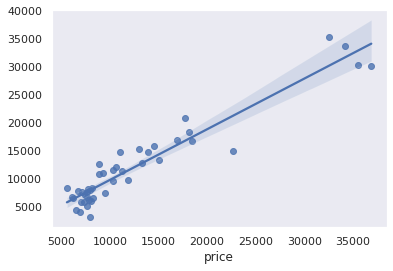

In [38]:
sns.regplot(y_test, LReg_pred)

<AxesSubplot:ylabel='Count'>

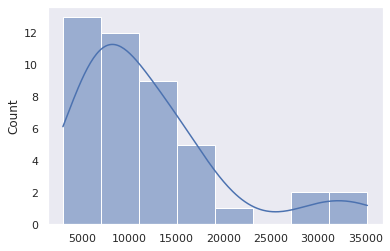

In [39]:
sns.histplot(LReg_pred, kde=True)

### ElasticNet

In [40]:
el_net = ElasticNet()

In [41]:
el_net.fit(X_train,y_train)

ElasticNet()

In [42]:
el_pred = el_net.predict(X_test)
el_pred

array([ 4090.48739732,  7881.91424561, 17558.57368755, 32090.62648447,
        7326.70016285, 15233.84418591, 19127.86294555,  7205.67348755,
        7645.41808721,  6940.70801849,  5934.4698594 ,  7183.38162745,
        5954.82931031, 13091.19199378, 11199.07993326,  7574.71412301,
       17881.63332523, 32020.04511611,  6262.49196706,  6592.59399067,
        4499.83353179, 11830.79798146, 11702.53540425, 18708.8555903 ,
       12240.57577335, 12757.27704576, 13691.38361597,  5011.70004859,
       16096.90179365,  6856.80762483,  7989.45532634,  7013.32202062,
       15942.41152809, 12478.00364549, 11372.26035205,  7405.92866282,
        9275.63250461, 30146.1276998 , 23210.15138213,  6517.50957884,
       10952.73749686, 13408.38451785,  7771.39849716,  7194.92640303])

In [43]:
r2_score(y_test, el_pred)

0.8936671209815054

In [44]:
mean_absolute_error(y_test, el_pred)

1806.8852306031047

In [45]:
max_error(y_test, el_pred)

9317.848617866519

/home/supatet/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

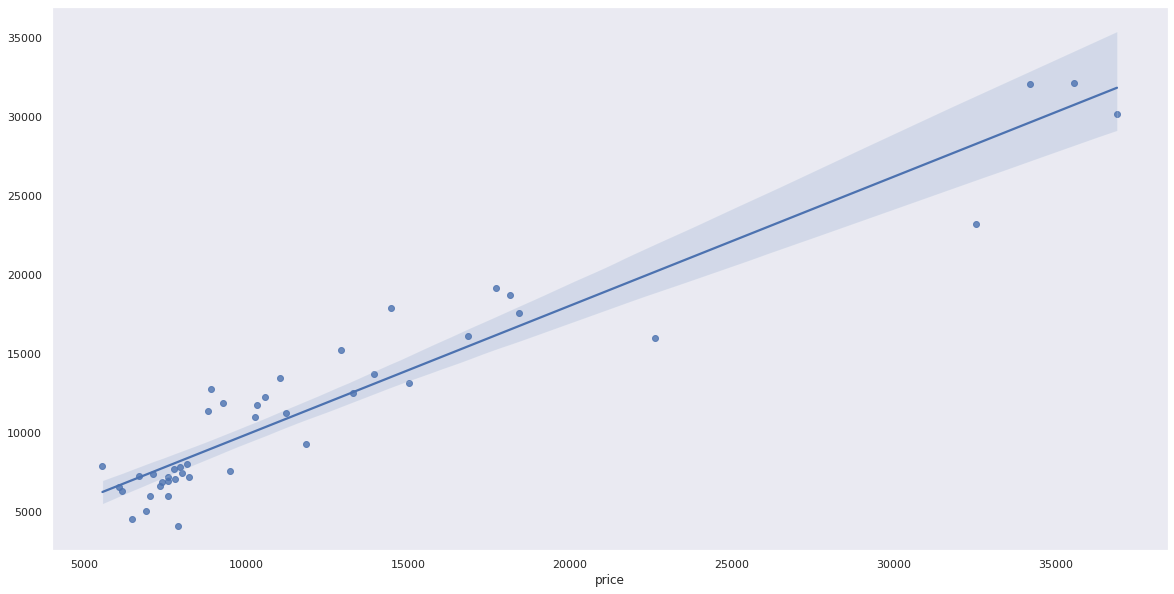

In [46]:
plt.figure(figsize=(20,10))
sns.regplot(y_test, el_pred)

### ARDRegression

In [47]:
ARDReg = ARDRegression()

In [48]:
ARDReg.fit(X_train, y_train)

ARDRegression()

In [49]:
ARDpred = ARDReg.predict(X_test)
ARDpred

array([ 4064.41470854,  7380.00415644, 15799.3590622 , 31961.24599067,
        7858.11152914, 14940.9696147 , 21366.71122655,  7692.04498114,
        6752.24996909,  6685.13607671,  6145.36605975,  7692.04474736,
        5543.93051255, 12204.26565827, 10728.5948389 ,  7079.78094431,
       16980.43805579, 32008.51318389,  6821.78530238,  6655.24126978,
        4399.80379632, 11243.60684469, 12198.98098512, 18596.57786204,
       12568.50073914, 12465.88209803, 13664.82438277,  5131.60594533,
       16543.21756703,  7058.05852003,  7938.71925169,  6666.28254399,
       16846.97731093, 12669.79679196, 11217.86005768,  7651.48784237,
       10136.83652913, 29955.26578228, 35204.05869438,  6919.97672853,
        9143.15720096, 13917.01496188,  7930.43288756,  6619.45776694])

In [50]:
r2_score(y_test, ARDpred)

0.9180111821080791

In [51]:
mean_absolute_error(y_test, ARDpred)

1794.285140705295

In [52]:
max_error(y_test, ARDpred)

6924.734217721198

<AxesSubplot:ylabel='Count'>

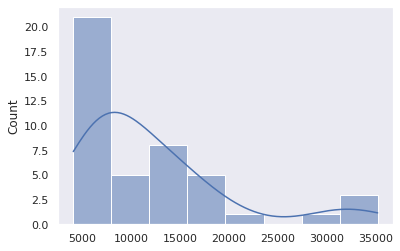

In [53]:
sns.histplot(ARDpred, kde=True)

/home/supatet/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

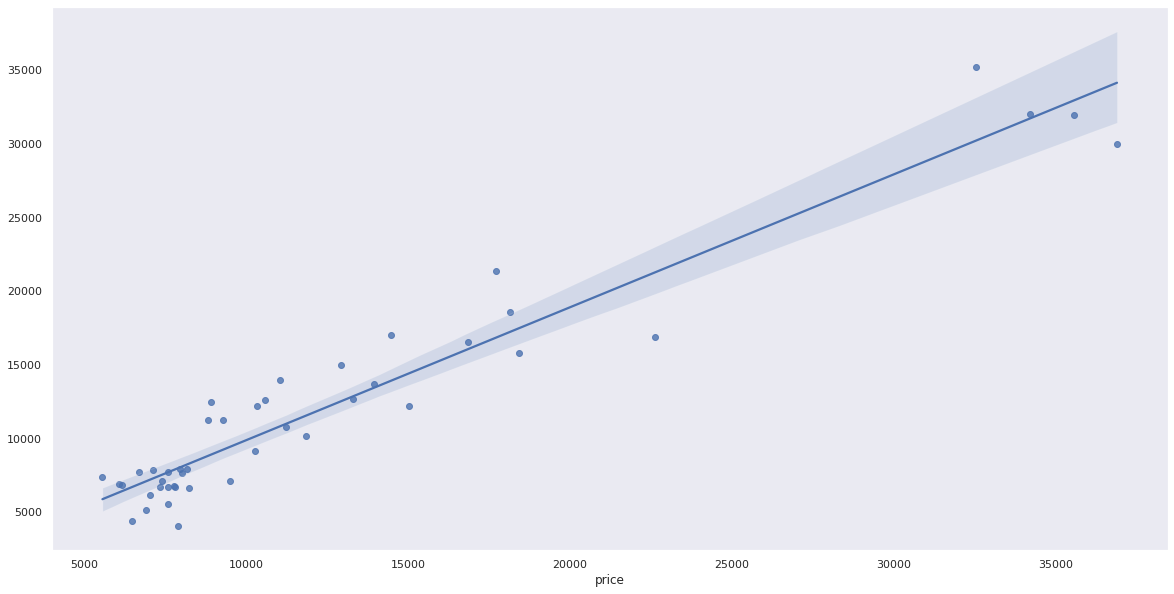

In [54]:
plt.figure(figsize=(20,10))
sns.regplot(y_test, ARDpred)

### QuantileRegressor

In [55]:
qt = QuantileRegressor()

In [56]:
qt.fit(X_train, y_train)

/home/supatet/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_quantile.py:270: ConvergenceWarning: Linear programming for QuantileRegressor did not succeed.
Status is 4: Numerical difficulties encountered.
Result message of linprog:
The solution does not satisfy the constraints within the required tolerance of 3.16E-04, yet no errors were raised and there is no certificate of infeasibility or unboundedness. Check whether the slack and constraint residuals are acceptable; if not, consider enabling presolve, adjusting the tolerance option(s), and/or using a different method. Please consider submitting a bug report.
  warnings.warn(


QuantileRegressor()

In [57]:
qt_pred = qt.predict(X_test)
qt_pred

array([ 8074.87928013,  6149.2448602 , 16527.93306053, 32266.11766125,
        6833.17432244, 15511.3087889 , 16856.83761116,  7125.84263509,
        8775.71692688,  8079.81246659,  7804.12745255,  7141.96454683,
        8738.49874919, 13496.39342336, 11037.12280221,  8303.40540209,
       17878.41394369, 28788.23527914,  6306.35399008,  6872.72350317,
        5949.7336377 , 11241.28240957, 10646.54280669, 18029.76191046,
       11486.30245274, 13072.48207201, 11545.65645075,  7932.52735844,
       15822.76588771,  6402.22027357,  8226.63976084,  7048.96641901,
       16614.78526266, 13352.19476775, 10501.76551502, 10246.73163029,
        9206.75805496, 26217.83414197, 18630.2470667 ,  6125.75228262,
       11160.21787726, 14309.47270727,  8316.13386063,  6957.72551674])

In [58]:
y_test

154     7898.0
21      5572.0
198    18420.0
48     35550.0
34      7129.0
194    12940.0
6      17710.0
25      6692.0
159     7788.0
122     7609.0
139     7053.0
26      7609.0
140     7603.0
134    15040.0
177    11248.0
187     9495.0
84     14489.0
71     34184.0
77      6189.0
93      7349.0
152     6488.0
87      9279.0
42     10345.0
117    18150.0
61     10595.0
28      8921.0
3      13950.0
153     6918.0
200    16845.0
54      7395.0
185     8195.0
95      7799.0
204    22625.0
191    13295.0
39      8845.0
148     8013.0
56     11845.0
17     36880.0
126    32528.0
51      6095.0
40     10295.0
46     11048.0
183     7975.0
98      8249.0
Name: price, dtype: float64

In [59]:
r2_score(y_test, qt_pred)

0.8337646818887032

/home/supatet/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

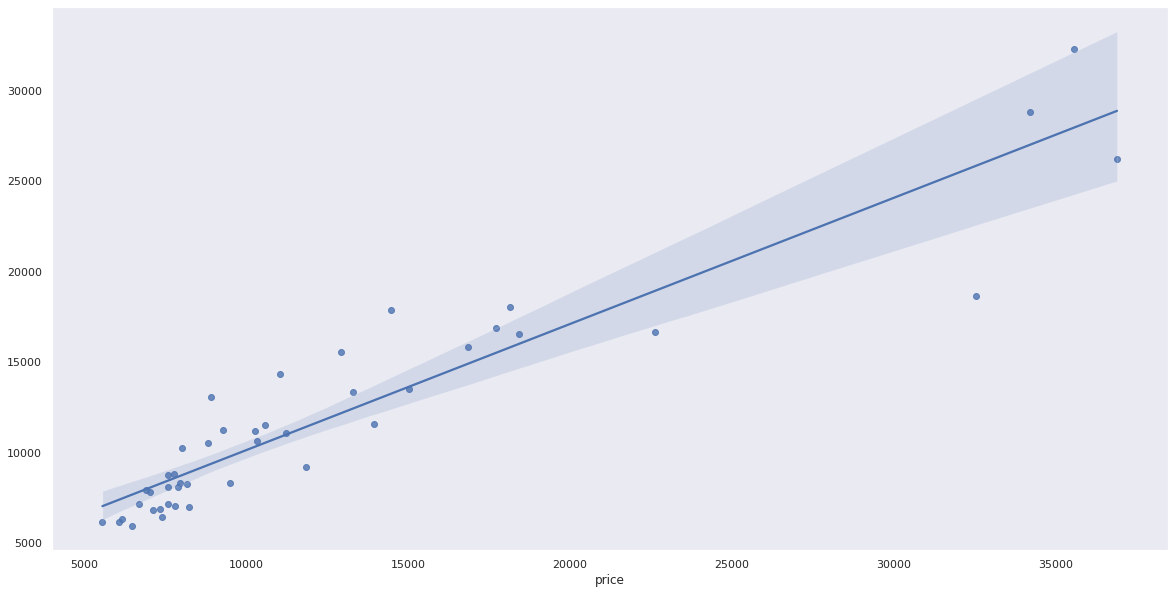

In [60]:
plt.figure(figsize=(20,10))
sns.regplot(y_test, qt_pred)

<AxesSubplot:ylabel='Count'>

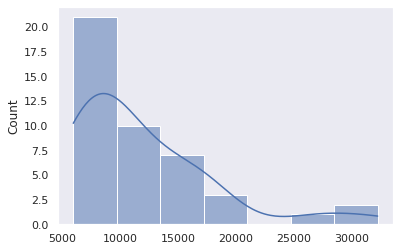

In [61]:
sns.histplot(qt_pred, kde=True)